In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
with open("../personas.json", 'r', encoding='utf-8') as json_file:
    personas = json.load(json_file)

In [5]:
personas[0]

{'age': 26,
 'gender': 'mann',
 'kids': True,
 'occupation': 'pensjonert/uføretrygdet',
 'persona_str': 'Du er en mann som er 26 år, har barn og er pensjonert/uføretrygdet. Du skal svare på en spørreundersøkelse sånn som denne personen ville gjort. Svar bare ett alternativ.'}

In [6]:
llama3 = pd.read_json('../results_manual_processing/llama3/combined_llama3.json', orient="index")
llama3_2 = pd.read_json('../results_manual_processing/llama3_2/combined_llama3_2.json', orient="index")
mistral = pd.read_json('../results_manual_processing/mistral/combined_mistral.json', orient="index")
mistral2 = pd.read_json('../results_manual_processing/mistral2/combined_mistral2.json', orient="index")
normistral = pd.read_json('../results_manual_processing/normistral/combined_normistral.json', orient="index")
normistral2 = pd.read_json('../results_manual_processing/normistral2/combined_normistral2.json', orient="index")
norwAI = pd.read_json('../results_manual_processing/norwAI_mistral/combined_norwAI.json', orient="index")
norwAI2 = pd.read_json('../results_manual_processing/norwAI_mistral2/combined_norwAI2.json', orient="index")


In [7]:
llama3.head()

,Spm1,Spm2,Spm3,spm6_1,spm6_2,spm6_3,spm6_4,spm6_5,spm6_6,spm6_7,...,Spm48e,Spm48f,Spm48g,Spm51a,Spm51b,Spm51c,Spm51d,Spm51e,Spm51f,Spm51g
0,2,2,2,4,5,6,5,4,7,1,...,2,5,5,5,1,3,5,5,5,2
1,2,2,2,5,5,5,5,5,5,4,...,2,5,2,5,1,2,5,2,5,2
2,2,2,2,5,5,5,5,4,3,1,...,2,5,4,5,1,2,5,4,5,2
3,2,2,2,2,2,2,5,3,3,2,...,1,5,1,5,1,3,5,5,5,2
4,2,2,2,3,3,5,5,4,3,3,...,1,5,1,5,1,3,5,5,5,2


In [8]:
def get_persona_attribute(persona_key, attribute_key, dictionary):
    return dictionary[persona_key][attribute_key]

def convert_age(age):
    if age <= 30:
        return 1
    elif age <= 50:
        return 2
    else:
        return 3
    
def convert_gender(gender_str):
    if gender_str == "mann":
        return 1
    else:
        return 2
    
def convert_occupation(occ_str):
    if occ_str == "I arbeid":
        return 1
    elif occ_str == "student":
        return 2
    elif occ_str == "pensjonert/uføretrygdet":
        return 3
    elif occ_str == "arbeidsledig":
        return 5
    
def convert_kids(has_kids):
    if has_kids:
        return 1
    else:
        return 2

In [9]:
age_list = [convert_age(get_persona_attribute(i, "age", personas)) for i in range(120)]
gender_list = [convert_gender(get_persona_attribute(i, "gender", personas)) for i in range(120)]
occupation_list = [convert_occupation(get_persona_attribute(i, "occupation", personas)) for i in range(120)]
kids_list = [convert_kids(get_persona_attribute(i, "kids", personas)) for i in range(120)]

In [10]:
print(age_list)
print(gender_list)
print(occupation_list)
print(kids_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1]
[3, 2, 5, 1, 1, 1, 1, 2, 2, 1, 5, 5, 3, 2, 3, 5, 2, 3, 3, 1, 3, 2, 1, 5, 2, 1, 5, 1, 5, 3, 3, 1, 2, 5, 5, 3, 2, 2, 5, 3, 3, 5, 2, 2, 5, 3, 1, 5, 2, 3, 1, 2, 1, 2, 3, 3, 1, 5, 1, 2, 3, 3, 5, 5, 2, 1, 3, 3, 3, 2, 1, 1, 5, 5, 1, 2, 2, 5, 1, 5, 5, 3, 1, 5, 3, 1, 1, 1, 5, 2, 2, 1, 3

In [11]:
all_dfs =[llama3, llama3_2, mistral, mistral2, normistral, normistral2, norwAI, norwAI2]
for df in all_dfs:
    df.replace("UNKNOWN", np.nan, inplace = True)
    #df.replace("None", np.nan, inplace = True)
    df.fillna(value=np.nan, inplace= True)
    df["Kjonn"] = gender_list
    df["alder3"] = age_list
    df["Bak3a"] = occupation_list
    df["Bak2a"] = kids_list

C:\Users\snorr\AppData\Local\Temp\ipykernel_17340\3562462910.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("UNKNOWN", np.nan, inplace = True)
C:\Users\snorr\AppData\Local\Temp\ipykernel_17340\3562462910.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("UNKNOWN", np.nan, inplace = True)


In [12]:
#normistral.replace("UNKNOWN", np.nan, inplace = True)
normistral.head()

,Spm1,Spm2,Spm3,spm6_1,spm6_2,spm6_3,spm6_4,spm6_5,spm6_6,spm6_7,...,Spm51b,Spm51c,Spm51d,Spm51e,Spm51f,Spm51g,Kjonn,alder3,Bak3a,Bak2a
0,4,3,3,3,NaN,3,NaN,1,1,NaN,...,1,5,1,1,1,1,1,1,3,1
1,1,3,2,7,3,7,5,8,NaN,4,...,NaN,2,NaN,1,5,2,2,1,2,2
2,3,1,NaN,1,1,8,5,7,2,NaN,...,NaN,NaN,NaN,2,NaN,1,2,1,5,1
3,1,1,1,NaN,3,7,5,7,3,3,...,1,NaN,NaN,1,NaN,2,1,1,1,2
4,3,1,NaN,7,2,3,NaN,3,2,1,...,NaN,NaN,NaN,1,2,NaN,1,1,1,2


In [13]:
QUESTION_IDS = ["Spm1", "Spm2", "Spm3", 
                "spm6_1","spm6_2","spm6_3","spm6_4","spm6_5","spm6_6","spm6_7","spm6_8","spm6_9","spm6_10","spm6_11",
                "spm17_1","spm17_2","spm17_3","spm17_4","spm17_5","spm17_6","spm17_7","spm17_8","spm17_9",
                "spm19_1","spm19_2","spm19_3","spm19_4","spm19_5","spm19_6","spm19_7","spm19_8","spm19_9",
                "Spm5a","Spm5b","Spm5c","Spm5d","Spm5e","Spm5f","Spm5g","Spm5h","Spm5i",
                "Spm7a","Spm7b","Spm7c","Spm7d","Spm7e","Spm7f","Spm7g",
                "Spm23a","Spm23b","Spm23c","Spm23d","Spm23e","Spm23f","Spm23h",
                "Spm31a","Spm31b","Spm31c","Spm48a","Spm48b","Spm48c","Spm48d","Spm48e","Spm48f","Spm48g",
                "Spm51a","Spm51b","Spm51c","Spm51d","Spm51e","Spm51f","Spm51g",
                ]
INTEREST_IDS = ["Spm1", "Spm2", "Spm3"]
PARTY_IDS = ["spm6_1","spm6_2","spm6_3","spm6_4","spm6_5","spm6_6","spm6_7","spm6_8","spm6_9","spm6_10","spm6_11",
                "spm17_1","spm17_2","spm17_3","spm17_4","spm17_5","spm17_6","spm17_7","spm17_8","spm17_9",
                "spm19_1","spm19_2","spm19_3","spm19_4","spm19_5","spm19_6","spm19_7","spm19_8","spm19_9",]

CLAIM_IDS = ["Spm5a","Spm5b","Spm5c","Spm5d","Spm5e","Spm5f","Spm5g","Spm5h","Spm5i",
                "Spm7a","Spm7b","Spm7c","Spm7d","Spm7e","Spm7f","Spm7g",
                "Spm23a","Spm23b","Spm23c","Spm23d","Spm23e","Spm23f","Spm23h",
                "Spm31a","Spm31b","Spm31c","Spm48a","Spm48b","Spm48c","Spm48d","Spm48e","Spm48f","Spm48g",
                "Spm51a","Spm51b","Spm51c","Spm51d","Spm51e","Spm51f","Spm51g",
                ]

In [14]:
def plot_political_interest(df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    for i, col in enumerate(INTEREST_IDS):
        counts = df[col].value_counts(dropna=False)
        counts.index = counts.index.astype(str)
        counts_sorted = counts.sort_index(ascending=True)

        counts_sorted.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{INTEREST_IDS[i]} Distribution")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count' if i == 0 else "")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


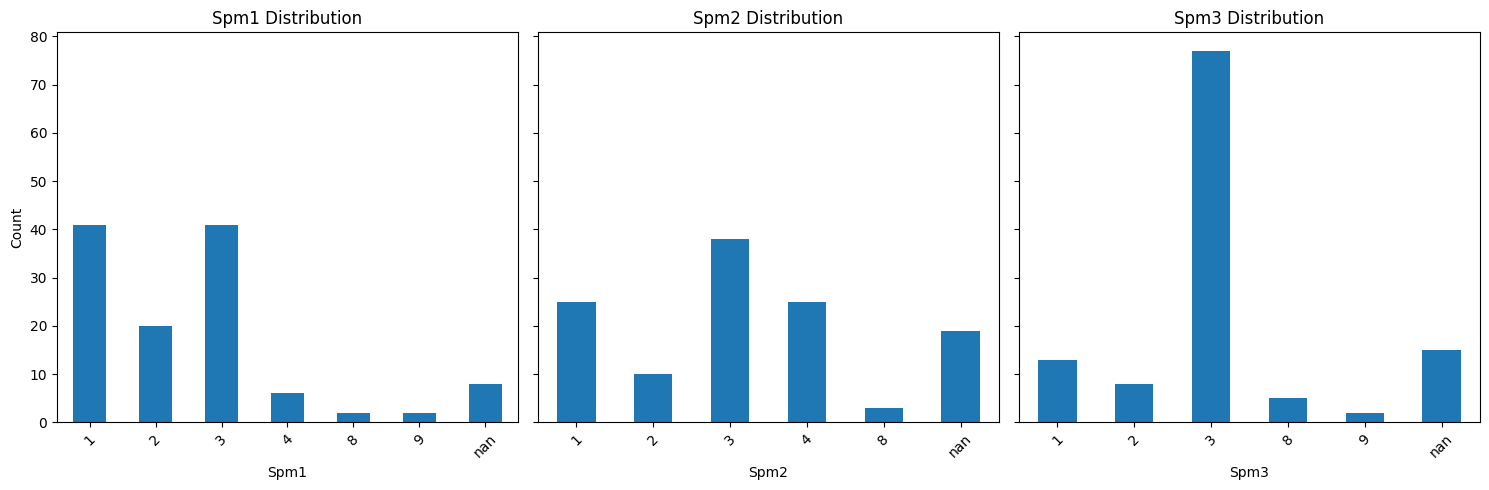

In [15]:
plot_political_interest(normistral)

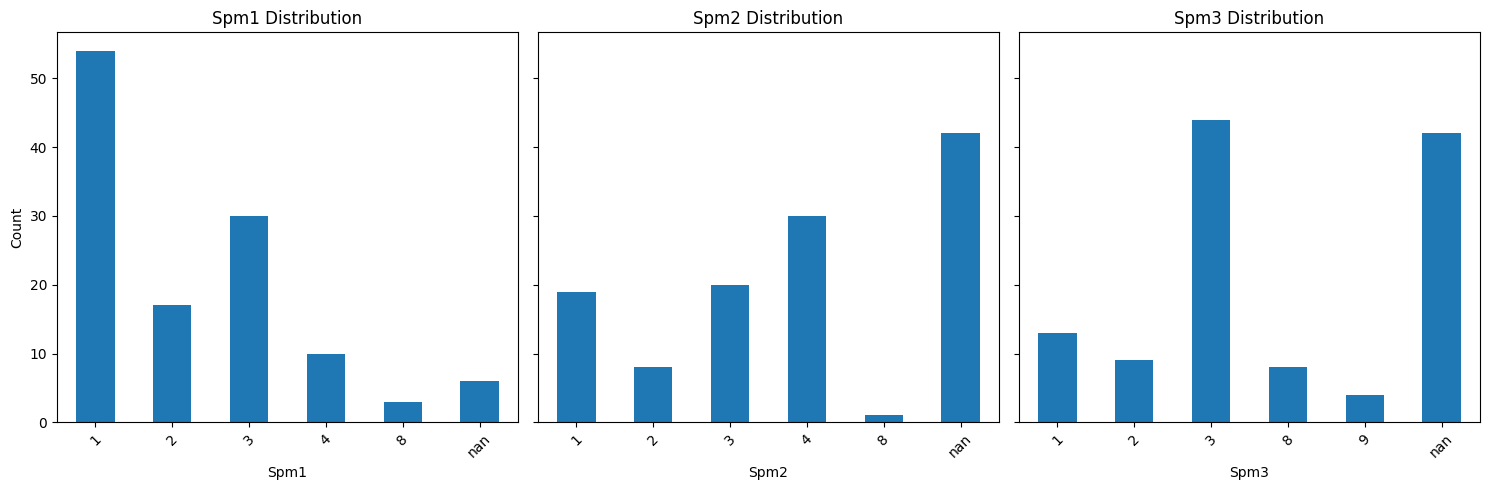

In [16]:
plot_political_interest(normistral2)

In [17]:
#normistral_combined = normistral.copy(deep=True)
#normistral_combined.concat(normistral2)
normistral_combined = pd.concat([normistral, normistral2])

In [18]:
normistral_combined

,Spm1,Spm2,Spm3,spm6_1,spm6_2,spm6_3,spm6_4,spm6_5,spm6_6,spm6_7,...,Spm51b,Spm51c,Spm51d,Spm51e,Spm51f,Spm51g,Kjonn,alder3,Bak3a,Bak2a
0,4,3,3,3,NaN,3,NaN,1,1,NaN,...,1,5,1,1,1,1,1,1,3,1
1,1,3,2,7,3,7,5,8,NaN,4,...,NaN,2,NaN,1,5,2,2,1,2,2
2,3,1,NaN,1,1,8,5,7,2,NaN,...,NaN,NaN,NaN,2,NaN,1,2,1,5,1
3,1,1,1,NaN,3,7,5,7,3,3,...,1,NaN,NaN,1,NaN,2,1,1,1,2
4,3,1,NaN,7,2,3,NaN,3,2,1,...,NaN,NaN,NaN,1,2,NaN,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,4,2,2,3,NaN,5,3,3,NaN,...,NaN,1,1,5,1,1,2,3,2,1
116,1,4,2,NaN,5,3,5,3,5,7,...,NaN,NaN,1,2,2,NaN,2,3,1,2
117,4,3,3,5,NaN,7,5,3,1,8,...,NaN,1,NaN,9,NaN,NaN,2,3,3,2
118,1,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,1,3,1,1


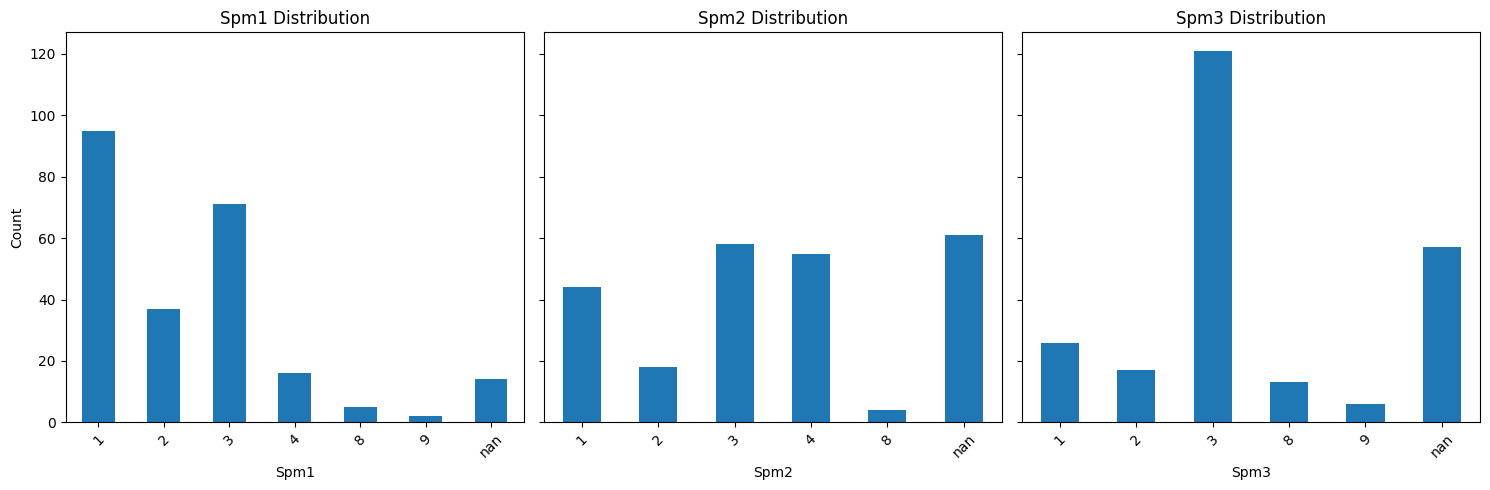

In [19]:
plot_political_interest(normistral_combined)

In [20]:
llama3_combined = pd.concat([llama3, llama3_2])
mistral_combined = pd.concat([mistral, mistral2])
norwAI_combined = pd.concat([norwAI, norwAI2])

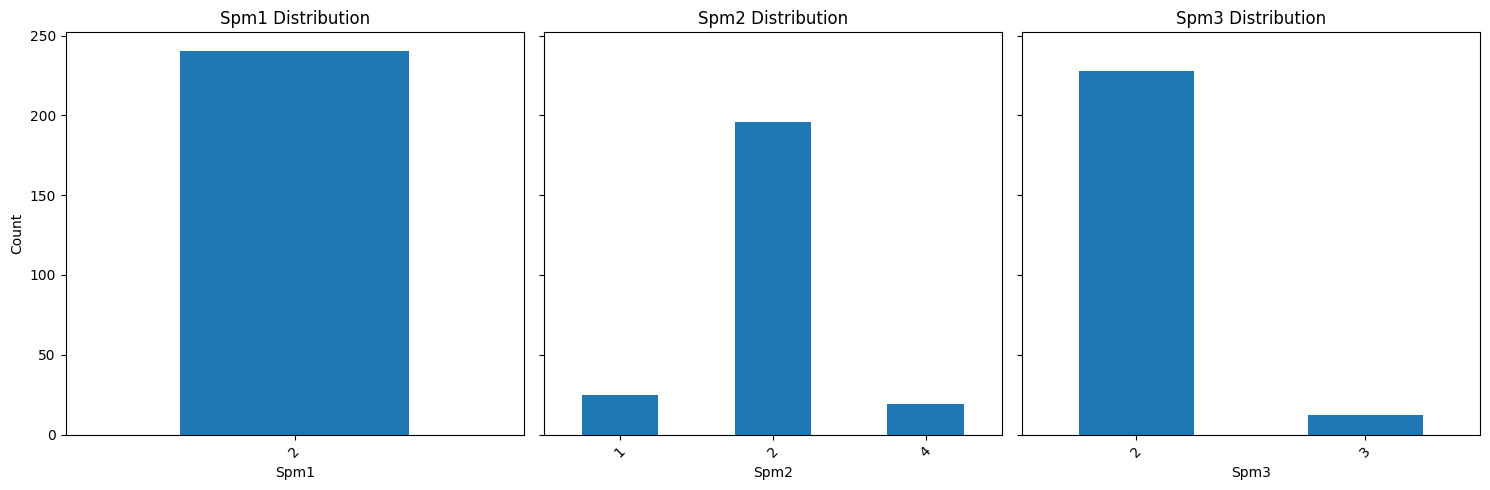

In [21]:
plot_political_interest(llama3_combined)

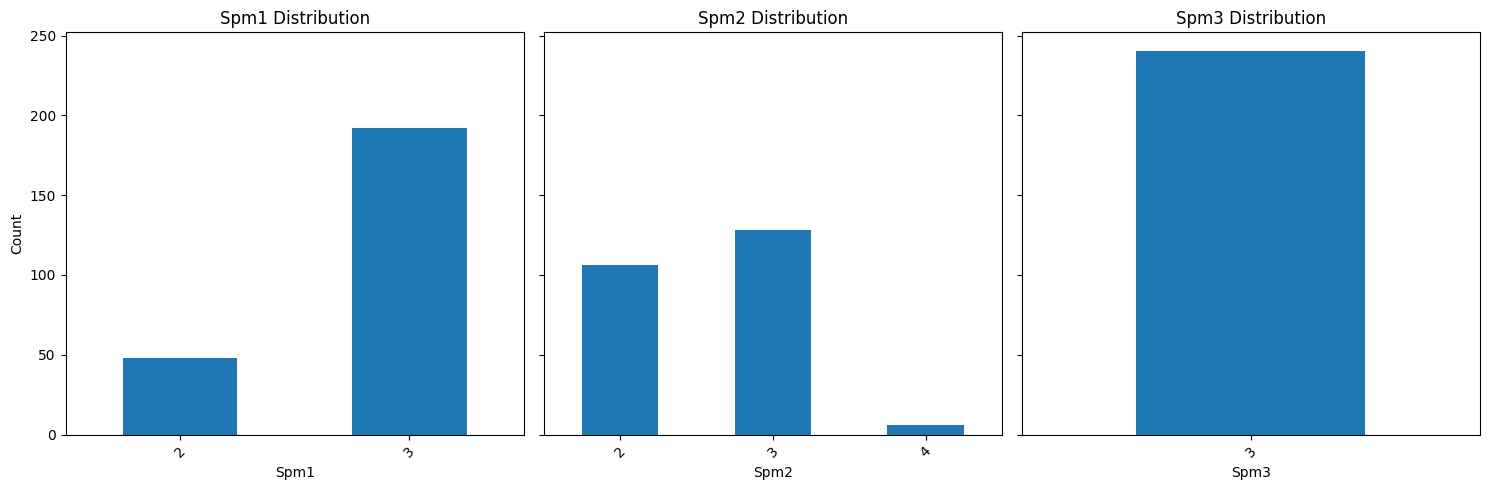

In [22]:
plot_political_interest(mistral_combined)

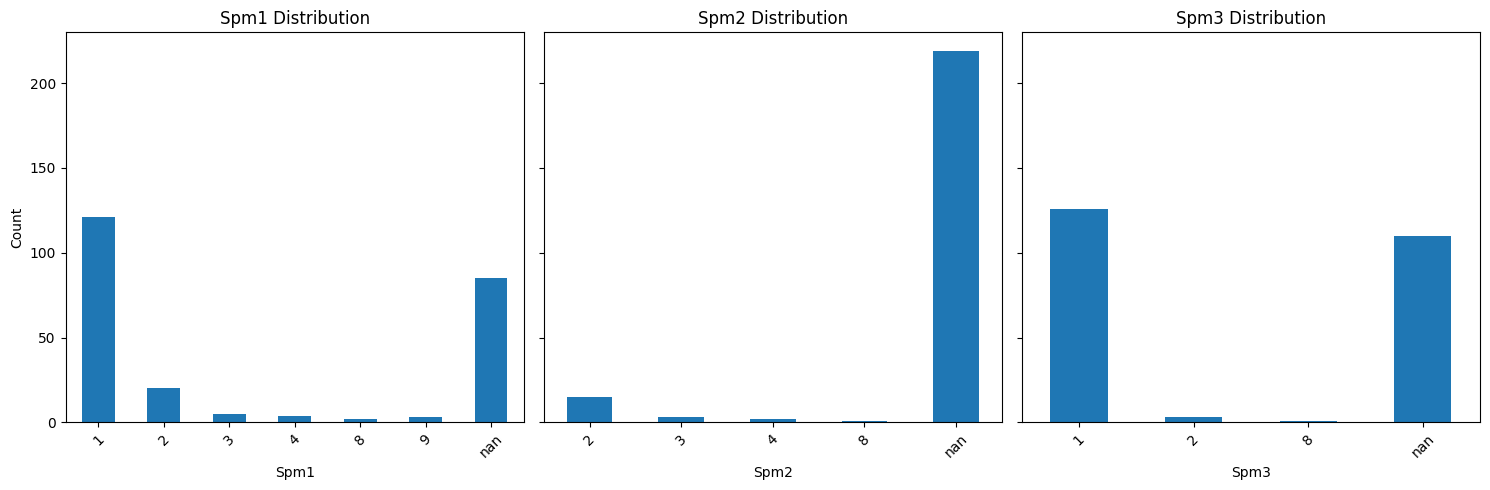

In [23]:
plot_political_interest(norwAI_combined)

In [24]:
def generate_dist(df, q_id):
    clean = df[q_id].astype(str).str.strip()
    counts = clean.value_counts(dropna=False)
    counts.index = counts.index.astype(str)
    counts_sorted = counts.sort_index(ascending=True)
    counts_sorted.plot(kind='bar')
    plt.title(f"Distribution of {q_id}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


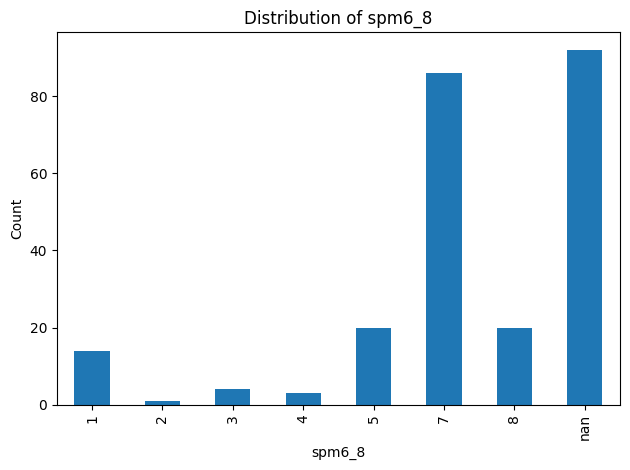

In [25]:
generate_dist(normistral_combined, "spm6_8")

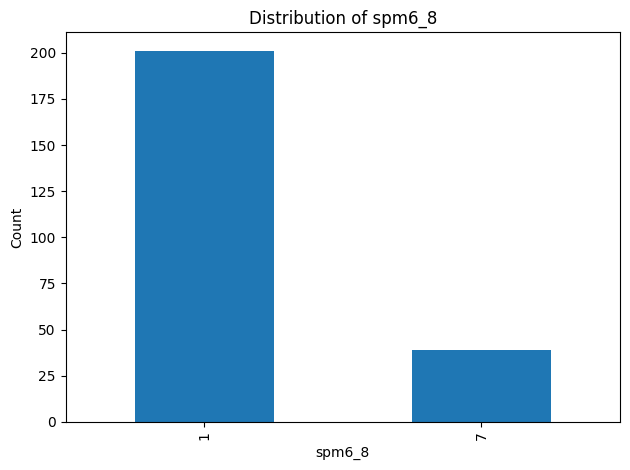

In [26]:
generate_dist(norwAI_combined, "spm6_8")

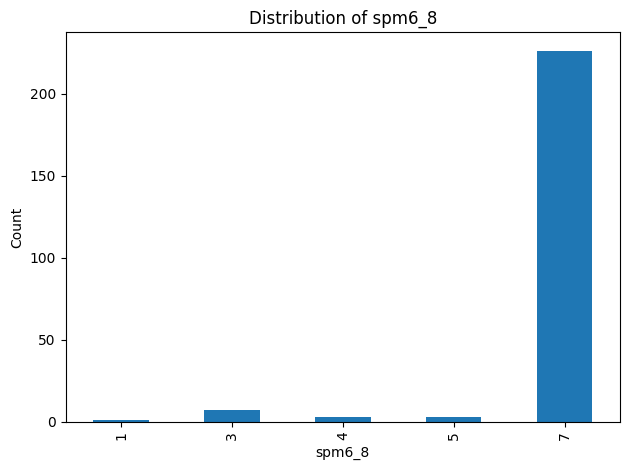

In [27]:
generate_dist(llama3_combined, "spm6_8")

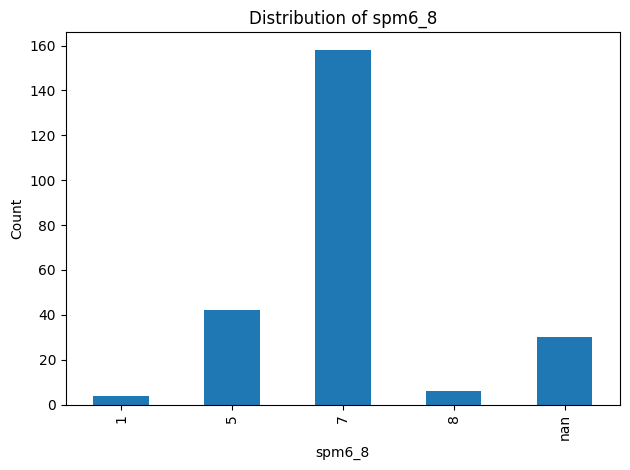

In [28]:
generate_dist(mistral_combined, "spm6_8")

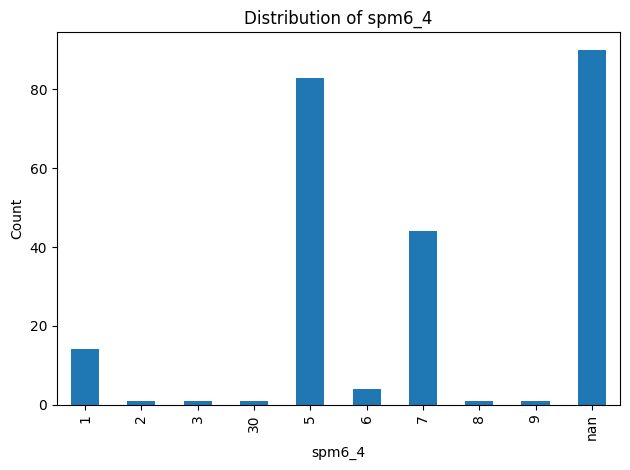

In [29]:
generate_dist(normistral_combined, "spm6_4")

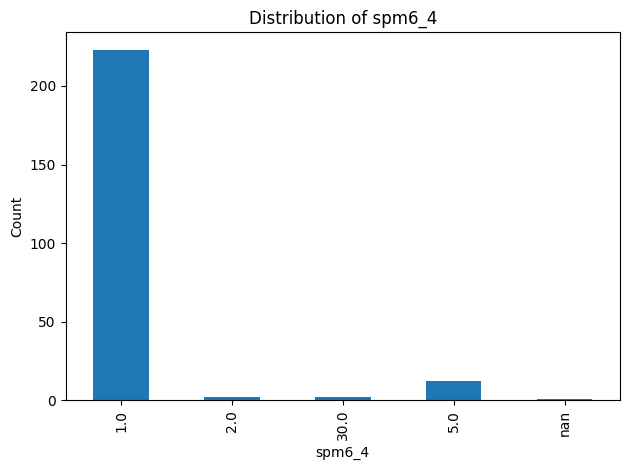

In [30]:
generate_dist(norwAI_combined, "spm6_4")

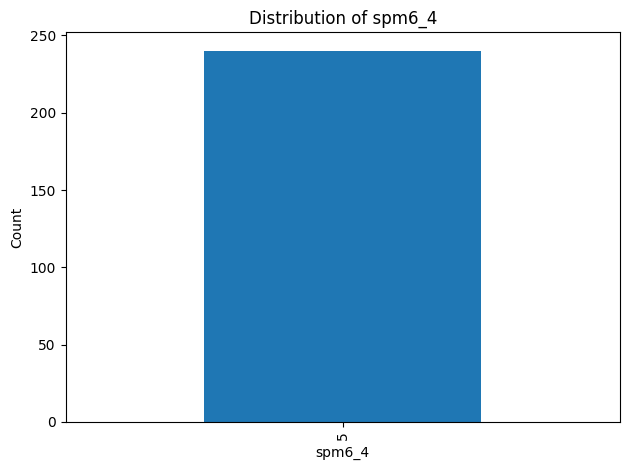

In [31]:
generate_dist(llama3_combined, "spm6_4")

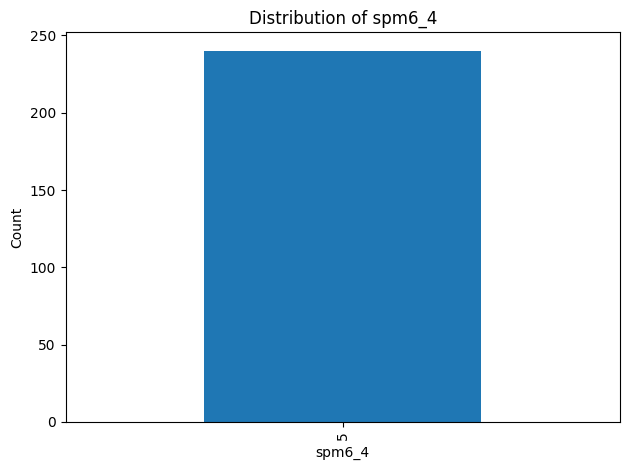

In [32]:
generate_dist(mistral_combined, "spm6_4")

In [33]:
#Changes the df by adding a new column "group" to it, dependent on existing columns. 
#Does not return anything
def add_group_to_df(df, *group_by_columns):
    df["group"] = df[list(group_by_columns)].astype(str).agg('_'.join, axis=1)

In [54]:
add_group_to_df(mistral_combined, 'Kjonn','alder3', 'Bak3a', 'Bak2a')
add_group_to_df(normistral_combined, 'Kjonn','alder3', 'Bak3a', 'Bak2a')
add_group_to_df(norwAI_combined, 'Kjonn','alder3', 'Bak3a', 'Bak2a')
add_group_to_df(llama3_combined, 'Kjonn','alder3', 'Bak3a', 'Bak2a')

In [35]:
mistral_combined.head()

,Spm1,Spm2,Spm3,spm6_1,spm6_2,spm6_3,spm6_4,spm6_5,spm6_6,spm6_7,...,Spm51c,Spm51d,Spm51e,Spm51f,Spm51g,Kjonn,alder3,Bak3a,Bak2a,group
0,3,3,3,5,4,6,5,8.0,7,8,...,4,5,1,4,1,1,1,3,1,1_1_3_1
1,3,3,3,5,5,5,5,8.0,7,8,...,4,5,1,4,1,2,1,2,2,2_1_2_2
2,3,2,3,5,4,8,5,8.0,7,4,...,4,5,1,4,1,2,1,5,1,2_1_5_1
3,3,3,3,5,1,6,5,8.0,7,4,...,4,5,1,4,1,1,1,1,2,1_1_1_2
4,3,3,3,5,1,6,5,8.0,7,5,...,4,5,1,4,1,1,1,1,2,1_1_1_2


In [36]:
groups = mistral_combined["group"].unique()

In [37]:
def split_gender_from_group(group_val):
    group_listed = group_val.split("_")
    gender_val = group_listed[0]
    rest_val = "_".join(group_listed[1:])
    return gender_val, rest_val

In [38]:
test_val = groups[0]
gender, rest =split_gender_from_group(test_val)
print(gender, rest)

1 1_3_1


In [39]:
rest_group_to_int = {}
counter = 0
for g in groups:
    gender, rest =split_gender_from_group(g)
    if rest not in rest_group_to_int:
        rest_group_to_int[rest] = counter
        counter += 1

In [40]:
rest_group_to_int

{'1_3_1': 0,
 '1_2_2': 1,
 '1_5_1': 2,
 '1_1_2': 3,
 '1_1_1': 4,
 '1_2_1': 5,
 '1_5_2': 6,
 '1_3_2': 7,
 '2_3_1': 8,
 '2_5_2': 9,
 '2_2_2': 10,
 '2_5_1': 11,
 '2_3_2': 12,
 '2_1_2': 13,
 '2_2_1': 14,
 '2_1_1': 15,
 '3_5_1': 16,
 '3_3_1': 17,
 '3_1_2': 18,
 '3_5_2': 19,
 '3_3_2': 20,
 '3_1_1': 21,
 '3_2_2': 22,
 '3_2_1': 23}

In [41]:
import matplotlib.colors as mcolors
#24 distinct colors, These were the ones I found which was the most distinct from eachother
css4_colors = list(mcolors.CSS4_COLORS.values())[:24]

In [62]:
def create_dist_w_group(df, question):
    fig, ax = plt.subplots(figsize=(14, 6))

    stripes = {"1": "//", "2": ""}
    group_color_ind = rest_group_to_int

    question_cleaned = df[question].astype(str).str.strip()
    temp_cleaned = df.copy()
    temp_cleaned[question] = question_cleaned

    group_counts = temp_cleaned.groupby(['group', question], dropna=False).size().unstack()
    
    bottom = np.zeros(len(group_counts.columns))
    x = np.arange(len(group_counts.columns))
                  
    for group, row in group_counts.iterrows():
        gender, rest = split_gender_from_group(group)
        stripe = stripes[gender]
        color_i = group_color_ind[rest]
        color = css4_colors[color_i]

        ax.bar(x, row.values, bottom=bottom, color=color, hatch=stripe, label=group, alpha=0.85)
        bottom += row.values
    ax.set_xticks(x)
    ax.set_xticklabels(group_counts.columns)
    ax.set_title(f"Distribution of {question} by Background Variables")
    ax.set_xlabel("Answer Option")
    ax.set_ylabel("Count")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Group (kjonn_Bak2a_Bak3a_alder3)")
    plt.tight_layout()
    plt.show()



C:\Users\snorr\AppData\Local\Temp\ipykernel_17340\2258943608.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


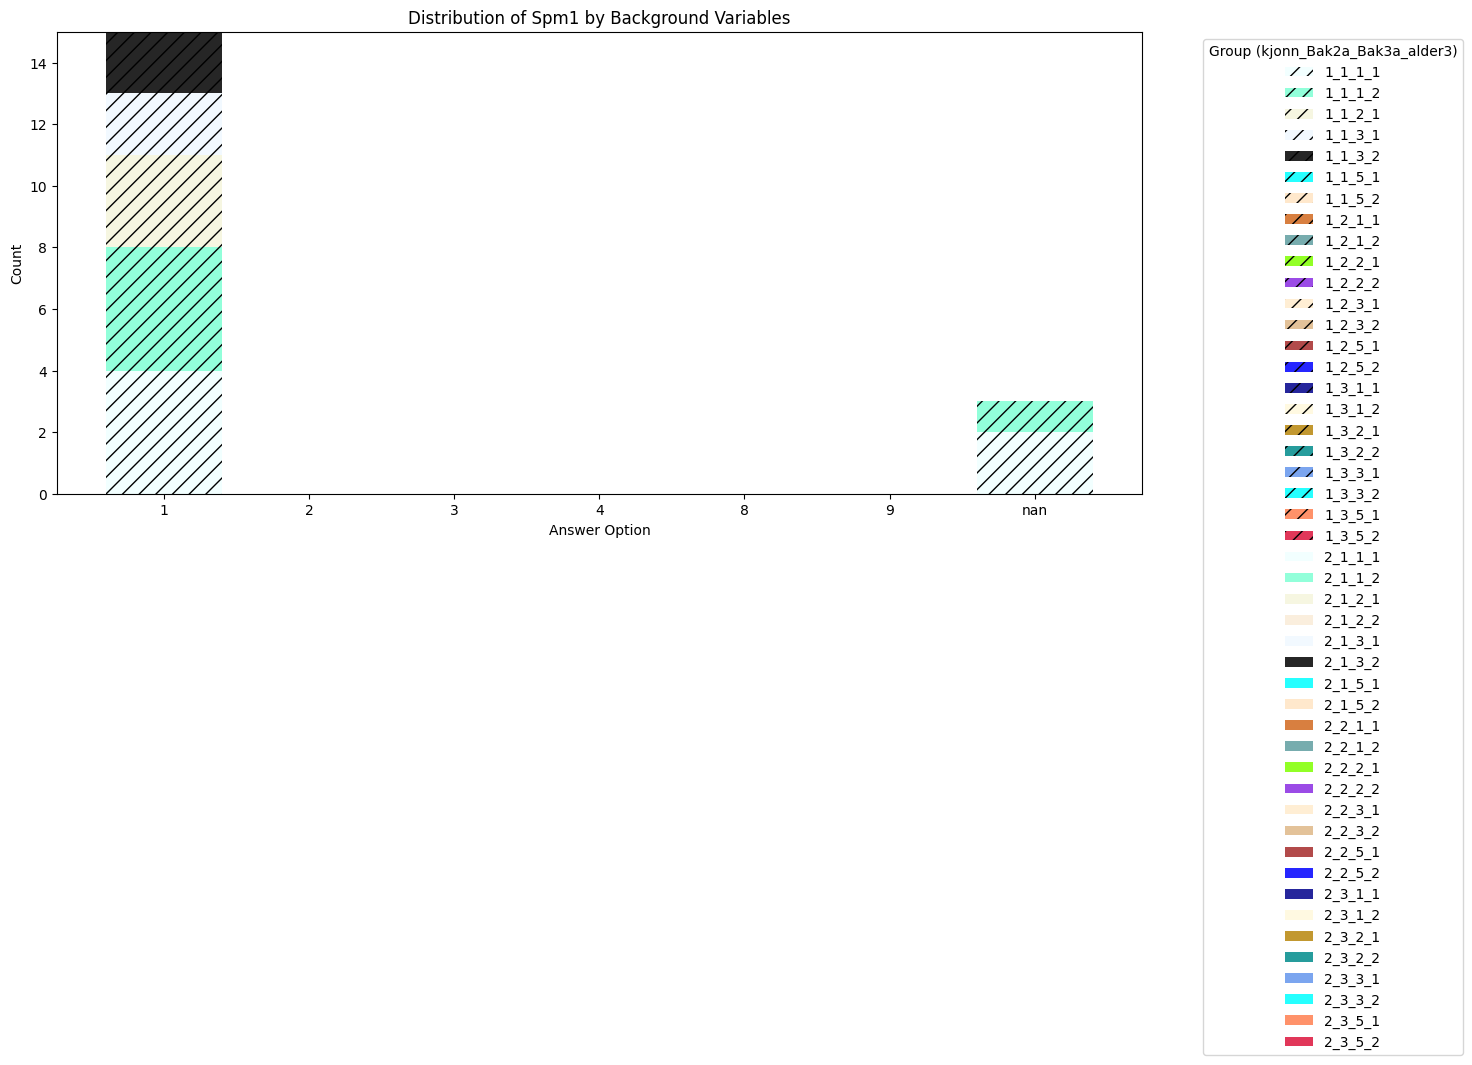

In [63]:
create_dist_w_group(normistral_combined, "Spm1")

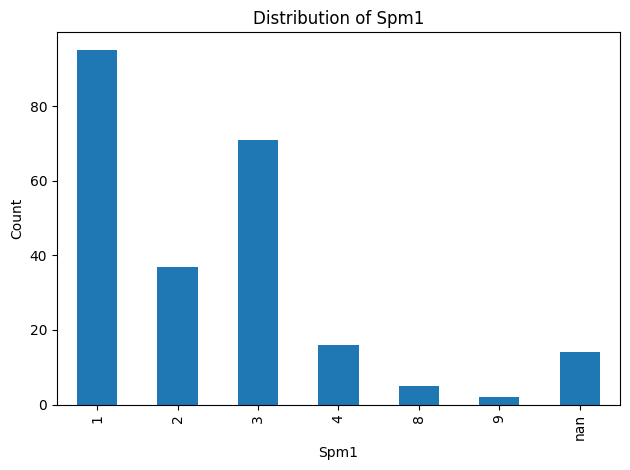

In [57]:
generate_dist(normistral_combined, "Spm1")

In [64]:
def create_dist_w_group_test(df, question):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(figsize=(14, 6))

    stripes = {"1": "//", "2": ""}  # Hatch for gender
    group_color_ind = rest_group_to_int  # Map group to color index

    # Clean and normalize the question responses
    question_cleaned = df[question].astype(str).str.strip().replace("nan", "NaN")

    # Create a temporary DataFrame to group on
    temp_df = df.copy()
    temp_df[question] = question_cleaned

    # Group and count
    group_counts = temp_df.groupby(['group', question], dropna=False).size().unstack(fill_value=0)

    bottom = np.zeros(len(group_counts.columns))
    x = np.arange(len(group_counts.columns))

    for group, row in group_counts.iterrows():
        gender, rest = split_gender_from_group(group)
        stripe = stripes.get(gender, "")
        color_i = group_color_ind.get(rest, 0)
        color = css4_colors[color_i % len(css4_colors)]

        ax.bar(x, row.values, bottom=bottom, color=color, hatch=stripe, label=group, alpha=0.85)
        bottom += row.values

    ax.set_xticks(x)
    ax.set_xticklabels(group_counts.columns)
    ax.set_title(f"Distribution of {question} by Background Variables")
    ax.set_xlabel("Answer Option")
    ax.set_ylabel("Count")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Group (kjonn_Bak2a_Bak3a_alder3)")
    plt.tight_layout()
    plt.show()

C:\Users\snorr\AppData\Local\Temp\ipykernel_17340\3619872611.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


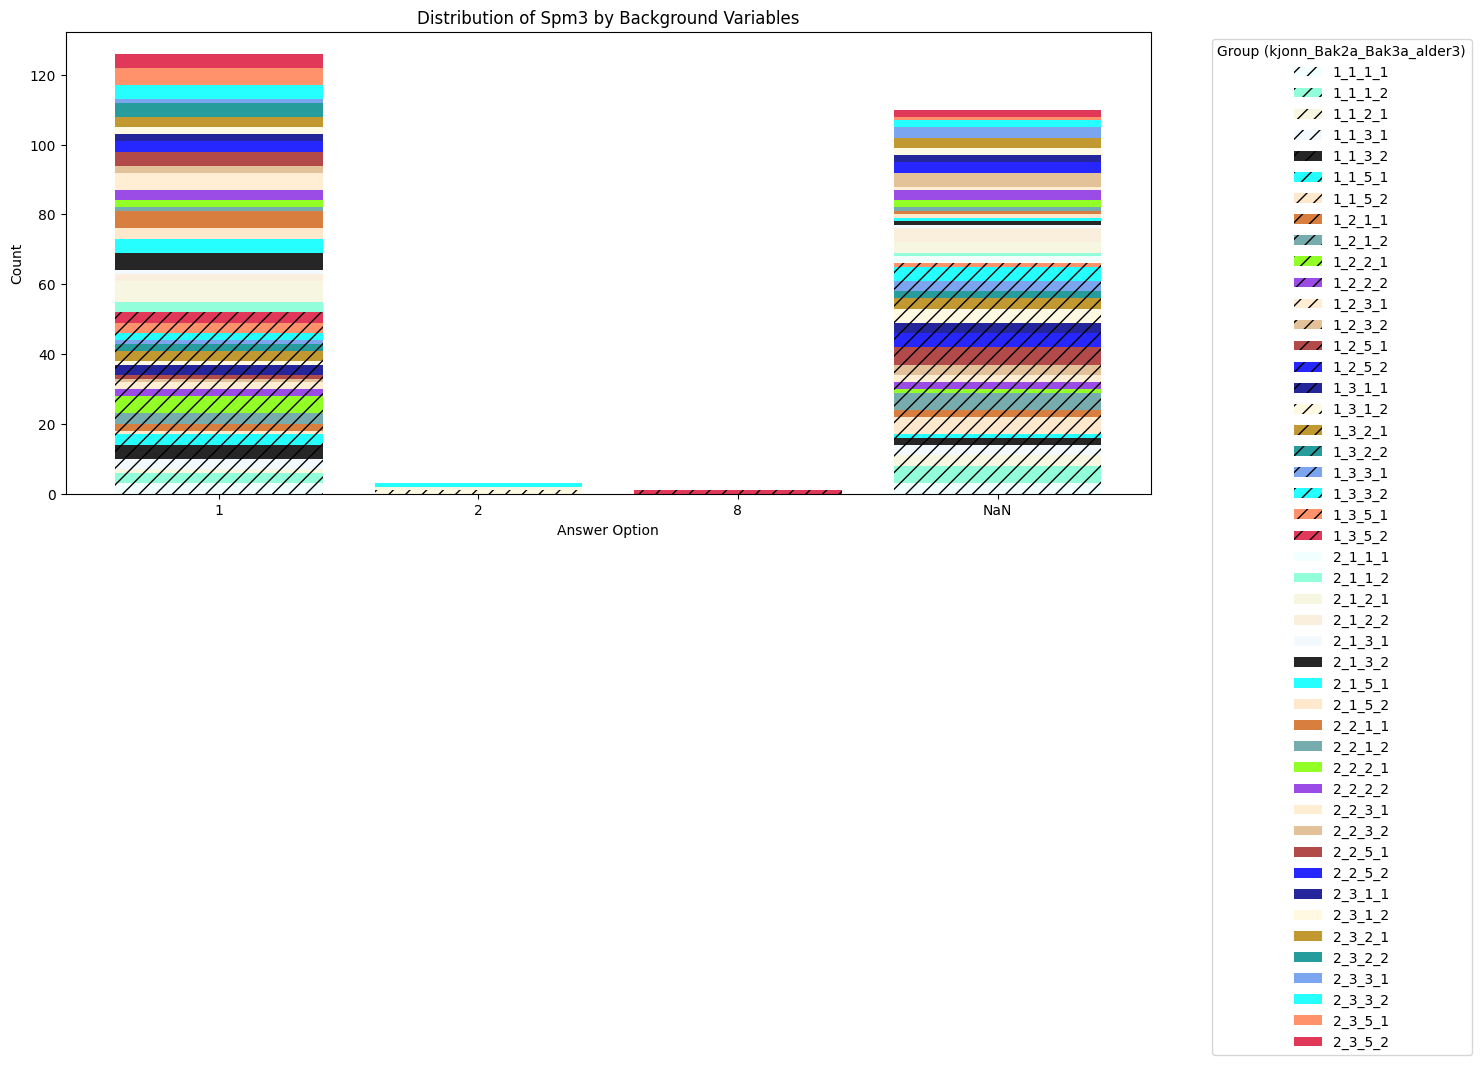

In [70]:
create_dist_w_group_test(norwAI_combined, "Spm3")

In [ ]:
mistral_combined["Spm1"]

0      3
1      3
2      3
3      3
4      3
      ..
115    2
116    2
117    3
118    2
119    3
Name: Spm1, Length: 240, dtype: int64